# Expertiments with directed and undirected graphs

( This is done using my sage310 or kerasenv3.10.6 environment )

In [6]:
%matplotlib inline

import scipy
import scipy.io
import pickle
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
import time
from sklearn.decomposition  import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn as sk
import random
import pprint
import numpy as np
import warnings



import helper_common_files as HCF


rand_state = 42
np.random.seed(rand_state)

In [7]:
kcorre_names = ( '1orbit-2-corre-dict', '1orbit-3-corre-dict', '1orbit-4-corre-dict', '1orbit-5-corre-dict', '1orbit-6-corre-dict') 
max_k = HCF.find_maximum_number(kcorre_names)

handle = open('dataset-simple-graphs/graph7.g6-skew.pickle', 'rb')


raw_dataset = pickle.load(handle)
handle.close()
dataset = raw_dataset[1]


Pollute with non-isomorphic graphs the dataset and check for the pollution.

In [44]:
non_isomorphic_graphs = len(raw_dataset[0])


print("Number of non-isomorphic graphs: ", non_isomorphic_graphs)

#### POLLUTE WITH NON-ISOMORPHIC
#raw_dataset = HCF.pollute_with_isomorphic_graphs(raw_dataset, 40, kcorre_names)


isomorphic_graphs = HCF.find_isomorphic_graphs(raw_dataset[0])
print("Number of isomorphic grpahs", len(isomorphic_graphs))
print("They are:")
pprint.pprint(isomorphic_graphs)

Number of non-isomorphic graphs:  1044
Number of isomorphic grpahs 0
They are:
[]


Let's create the table that is used to build the graph data structure

In [9]:
# Are you sure you want to run this? Very slow. 
##### TRIGGER LENTEZZA!!!
T_test = HCF.create_T_table_2(dataset, kcorre_names)


##### THIS IS THE FAST ALGORITHM
T = HCF.create_T_table(dataset, kcorre_names)
##### TODO MAYBE WE SHOULD TRUNCATE INSIDE THIS FUNCTION


--- computed distances ---
Finished clustering!
--- computed distances ---
Finished clustering!
--- computed distances ---
Finished clustering!
--- computed distances ---
Finished clustering!
--- computed distances ---
Finished clustering!


Create graph data structure from table

In [10]:
G = HCF.build_networkx_graph(T, maxk=5)


#### TESTING EVEN FURTHER THE EQUIVALENCE BETWEEN THE TWO GRAPHS
#G = HCF.build_networkx_graph(T_test, maxk=5)
#print(nx.is_isomorphic(G, G_test))

Let's find nodes or edges that are not linked to the main tree.

In [11]:
G_bfs = nx.bfs_tree(G, (0,0))
print("Number of nodes in original graph: {}, number of nodes in the BDF: {}".format(G.number_of_nodes(), G_bfs.number_of_nodes()))
print("Number of edges in original graph: {}, number of edgs in the BDF: {}".format(G.number_of_edges(), G_bfs.number_of_edges()))

Number of nodes in original graph: 4879, number of nodes in the BDF: 4879
Number of edges in original graph: 4893, number of edgs in the BDF: 4878


What's left in the graph if we remove the BFS?

In [46]:
G_leftover = HCF.graph_subtraction_nodes(G, G_bfs)

try:
    random_node = choice(list(G_leftover.nodes))
    print(random_node)
except Exception as e:
    print(e)

list index out of range


In [14]:
print("The G_bfs is a DAG?: ", nx.is_directed_acyclic_graph(G_bfs))

print("The G_bfs is a Tree?: ", nx.is_tree(G_bfs))

print("The G is a DAG?: ", nx.is_directed_acyclic_graph(G))

print("The G is a Tree?: ", nx.is_tree(G))


The G_bfs is a DAG?:  True
The G_bfs is a Tree?:  True
The G is a DAG?:  True
The G is a Tree?:  False


## Let's plot the tree! 

You can play with different numbe of iterations and figsize

In [15]:
#pos = nx.spring_layout(G_bfs, iterations=50)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

In [16]:
#pos = nx.spring_layout(G_bfs, iterations=100)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

## Do we gain distinguishing capabilities increasing k for the k-reduced-skew-spectrum?
YES!
### Lottery ticket: nodes with a split at depth k> 2

In [17]:
histogram, hits, lottery_tickets = HCF.count_bifurcations(G, kcorre_names)       

print("We have {} lottery tickets, i.e. nodes with a split at depth k>3 \n\n".format(len(lottery_tickets)))

pprint.pprint(histogram)

print("The number of nodes is ", G_bfs.number_of_nodes())
print("The number of graphs is ", len(raw_dataset[0]))

try:
    lottery_ticket = random.choice(lottery_tickets)
except Exception as e:
    pass

print("\n\nThe lottery tickets are:")
print(lottery_tickets)


We have 2 lottery tickets, i.e. nodes with a split at depth k>3 


{'1orbit-0-corre-dict': 723,
 '1orbit-2-corre-dict': 502,
 '1orbit-3-corre-dict': 4,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0}
The number of nodes is  4879
The number of graphs is  1044


The lottery tickets are:
[(3, 248, 405), (3, 314, 634)]


In [18]:
try:
    print("Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation):", nx.is_isomorphic(raw_dataset[0][lottery_ticket[1]], raw_dataset[0][lottery_ticket[2]]))
    print("Are the 3-correlations the same?", np.allclose(raw_dataset[1]['1orbit-3-corre-dict'][lottery_ticket[1]], raw_dataset[1]['1orbit-3-corre-dict'][lottery_ticket[2]]))
    print("Are the 4-correlations the same?",  np.allclose(raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]], raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]]))
    print("Let's print the difference between the two 4 correlations")
    print(raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]]- raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]])
except Exception as e:
    print(e)
    pass

Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation): False
Are the 3-correlations the same? True
Are the 4-correlations the same? False
Let's print the difference between the two 4 correlations
[ 0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.      

Let's plot some of those lottery tickets

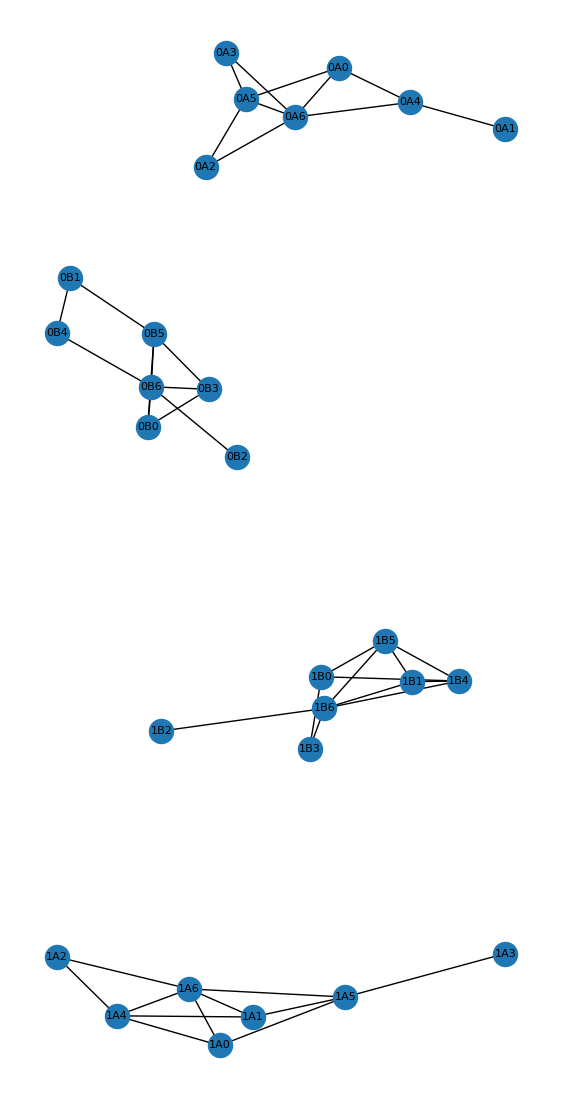

In [19]:
if len(lottery_tickets) > 0:    
    fig, axs = plt.subplots(nrows=len(lottery_tickets), figsize=(7, 7*len(lottery_tickets)))
    for i, ticket in enumerate(lottery_tickets):
        newgraph = nx.union(raw_dataset[0][ticket[1]], raw_dataset[0][ticket[2]], rename=("{}A".format(i), "{}B".format(i)))
        pos = nx.spring_layout(newgraph, iterations=20)
        #plt.figure(figsize=(7,7)) 
        #axs[i].imshow()
        nx.draw(newgraph, pos,  with_labels=True, font_size=8, ax=axs[i])

## Let's find graphs that we cannot distinguish in all the levels

In [20]:
non_singleton_nodes = {i:[] for i in range(7)}

for node in G:
    if len(node) > 2:
        non_singleton_nodes[node[0]].append(node)

print("The non singleton nodes are: ")
pprint.pprint(non_singleton_nodes)

The non singleton nodes are: 
{0: [],
 1: [],
 2: [(2, 76, 350),
     (2, 84, 78),
     (2, 130, 79),
     (2, 88, 82),
     (2, 83, 126),
     (2, 92, 86),
     (2, 96, 90),
     (2, 380, 188, 100),
     (2, 148, 102),
     (2, 149, 103),
     (2, 104, 205, 182),
     (2, 224, 364, 212, 108),
     (2, 162, 157, 270),
     (2, 204, 183),
     (2, 184, 378, 382),
     (2, 185, 217, 189),
     (2, 384, 186),
     (2, 371, 370, 187),
     (2, 372, 373, 190),
     (2, 386, 381, 191),
     (2, 193, 374),
     (2, 194, 388),
     (2, 196, 198),
     (2, 267, 206),
     (2, 264, 207),
     (2, 208, 354),
     (2, 209, 221, 359),
     (2, 355, 211),
     (2, 379, 219, 365),
     (2, 362, 222),
     (2, 225, 367),
     (2, 249, 231),
     (2, 233, 284),
     (2, 240, 241),
     (2, 242, 422, 390),
     (2, 423, 243, 391),
     (2, 426, 246),
     (2, 430, 433, 404, 247, 251),
     (2, 248, 405, 431),
     (2, 393, 250, 425),
     (2, 252, 413, 292),
     (2, 427, 253, 397),
     (2, 398, 428, 2

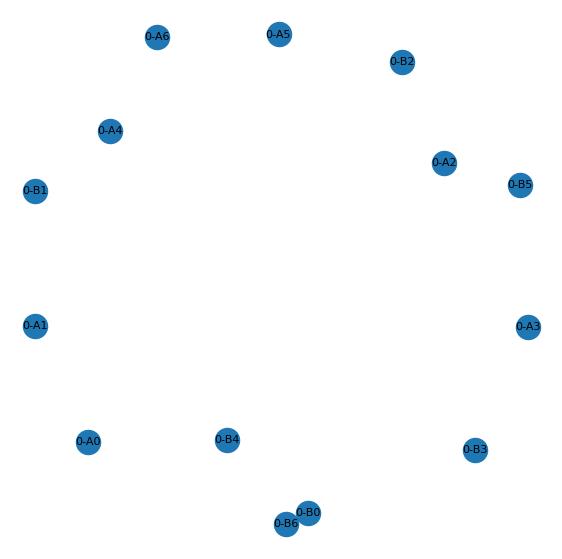

In [21]:
limit = 5
selected_k = 4

fig, axs = plt.subplots(nrows=len(non_singleton_nodes[selected_k][:limit]), figsize=(7, 7*len(non_singleton_nodes[selected_k][:limit])))
for i, ticket in enumerate(non_singleton_nodes[selected_k][:limit]):
    newgraph = nx.union(raw_dataset[0][ticket[1]], raw_dataset[0][ticket[2]], rename=("{}-A".format(i), "{}-B".format(i)))
    pos = nx.spring_layout(newgraph, iterations=50)
    nx.draw(newgraph, pos, ax=axs,  with_labels=True, font_size=8)
    #nx.draw(newgraph, pos, ax=axs[i],  with_labels=True, font_size=8)
    # If there is more then one non_singleton_nodes[selected_k] we need to use axs[i] instead of axs



## Limitations of the krsksp



Let's look at the leaves. There might be leaves with n at any layer (if we made error building the graph), and leaves at layer k=$maxk. Let's 

In [40]:
leaves = [x for x in G.nodes() if G.out_degree(x)==0]
print("Number of leaves", len(leaves))

non_separated_leaves = [x for x in G.nodes() if G.out_degree(x)==0 and len(x) > 2]  
print("Number of non separated leaves at any level: {}".format(len(non_separated_leaves)))
print(non_separated_leaves)

non_separated_leaves_lastk = [x for x in G.nodes() if G.out_degree(x)==0 and len(x) > 2 and x[0]==max_k] 
print("Number of non separated leaves at last layer 6: {}".format(len(non_separated_leaves_lastk)))
print(non_separated_leaves_lastk)

print('')


paths = nx.all_simple_paths(G, (0,0), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
paths = [path for path in paths]
print("The number of paths is: ", len(paths))
print("The paths are: ")
pprint.pprint(paths)

Number of leaves 1029
Number of non separated leaves at any level: 2
[(6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58), (6, 346, 78)]
Number of non separated leaves at last layer 6: 2
[(6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58), (6, 346, 78)]

The number of paths is:  15
The paths are: 
[[(0, 0),
  (2, 0),
  (3, 0),
  (4, 0, 1),
  (5, 0, 1, 57, 7),
  (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58)],
 [(0, 0),
  (2, 1),
  (3, 1),
  (4, 0, 1),
  (5, 0, 1, 57, 7),
  (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58)],
 [(0, 0),
  (2, 2),
  (3, 2),
  (4, 2),
  (5, 2),
  (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58)],
 [(0, 0),
  (2, 3),
  (3, 3),
  (4, 3),
  (5, 3),
  (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58)],
 [(0, 0),
  (2, 4),
  (3, 4),
  (4, 4),
  (5, 4),
  (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58)],
 [(0, 0),
  (2, 5),
  (3, 5),
  (4, 5),
  (5, 5),
  (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58)],
 [(0, 0),
  (2, 6),
  

### Finding collisions: nodes with indegree > 1

In [41]:
histogram, non_singleton_nodes = HCF.count_collisions(G, kcorre_names)      


print("Total indegree of collisions for each k")
pprint.pprint(histogram)
print("\n")
print("Recall the number of nodes with indegree bigger than 1 is: ", len(non_singleton_nodes))
print("\n")

try:
    hit = random.choice(hits)
    print("Random collision: {}".format(hit))
except Exception as e:
    print("Cannot find a collision:", e)


print("\nAll collisions:")
pprint.pprint(non_singleton_nodes)


Total indegree of collisions for each k
{'1orbit-0-corre-dict': 0,
 '1orbit-2-corre-dict': 0,
 '1orbit-3-corre-dict': 0,
 '1orbit-4-corre-dict': 2,
 '1orbit-5-corre-dict': 3,
 '1orbit-6-corre-dict': 14}


Recall the number of nodes with indegree bigger than 1 is:  4


Random collision: (2, 83, 126)

All collisions:
[(5, 0, 1, 57, 7),
 (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58),
 (6, 346, 78),
 (4, 0, 1)]


### Let's look at the edges that are in the graph but not in the tree.

Thus should return similar information to the cells above, i.e. edges that are creating collisions.

In [43]:
# Remove G_Bfs from G
G_leftover_edges = HCF.graph_subtraction_edges(G, G_bfs)

print("The nuber of edges that we removed is: {}.".format(len(G_leftover_edges.edges())))

for edge in G_leftover_edges.edges():
    print(edge)


The nuber of edges that we removed is: 15.
((5, 2), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 3), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 4), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 5), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 6), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 8), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 9), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 10), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 20), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 22), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 58), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
((5, 346), (6, 346, 78))
((4, 7), (5, 0, 1, 57, 7))
((4, 57), (5, 0, 1, 57, 7))
((3, 1), (4, 0, 1))


##  Plotting histograms


[723, 1042, 1043, 1041, 1029]
1044


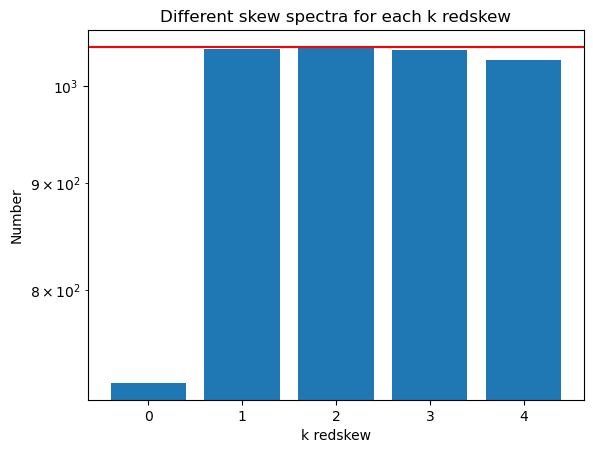

In [48]:
number_differe_kredskew = []
for kcorre_name in kcorre_names:
    number_differe_kredskew.append(len(set(tuple(row) for row in dataset[kcorre_name])))

print(number_differe_kredskew)
print(non_isomorphic_graphs)


plt.bar(range(len(kcorre_names)), number_differe_kredskew)

plt.axhline(y = non_isomorphic_graphs, color = 'r', linestyle = '-')     # non isomorphic graphs set at the beginning of the notebook

plt.xlabel('k redskew')
plt.ylabel('Number')
plt.yscale("log") 
plt.title('Different skew spectra for each k redskew')

plt.show()

In [ ]:
[723, 1042, 1043, 1041, 1029]
1044


CHECK WHY 1044 vs 1043 if there is a bug or is consistent with the rest of the things. 